In [1]:
%load_ext lab_black
%load_ext autotime
import pandas as pd
import numpy as np

time: 261 ms (started: 2023-02-05 20:23:22 -08:00)


The [O*NET Database](https://www.onetcenter.org/database.html) describes various jobs and the skills associated with them. Discovered from [a tweet by David Hood](https://twitter.com/Thoughtfulnz/status/1622029549310705664).

In [2]:
work_activities = pd.read_csv(
    "https://www.onetcenter.org/dl_files/database/db_27_1_text/Work%20Activities.txt",
    sep="\t",
)

time: 5.56 s (started: 2023-02-05 20:23:22 -08:00)


In [3]:
work_activities

,O*NET-SOC Code,Element ID,Element Name,Scale ID,Data Value,N,Standard Error,Lower CI Bound,Upper CI Bound,Recommend Suppress,Not Relevant,Date,Domain Source
0,11-1011.00,4.A.1.a.1,Getting Information,IM,4.72,35.0,0.13,4.46,4.98,N,NaN,07/2014,Incumbent
1,11-1011.00,4.A.1.a.1,Getting Information,LV,5.35,35.0,0.23,4.89,5.81,N,N,07/2014,Incumbent
2,11-1011.00,4.A.1.a.2,"Monitoring Processes, Materials, or Surroundings",IM,3.68,35.0,0.17,3.33,4.03,N,NaN,07/2014,Incumbent
3,11-1011.00,4.A.1.a.2,"Monitoring Processes, Materials, or Surroundings",LV,4.76,34.0,0.27,4.22,5.30,N,N,07/2014,Incumbent
4,11-1011.00,4.A.1.b.1,"Identifying Objects, Actions, and Events",IM,4.20,35.0,0.15,3.91,4.50,N,NaN,07/2014,Incumbent
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71581,53-7121.00,4.A.4.c.1,Performing Administrative Activities,LV,2.27,27.0,0.32,1.61,2.92,N,N,08/2019,Incumbent
71582,53-7121.00,4.A.4.c.2,Staffing Organizational Units,IM,1.93,27.0,0.21,1.50,2.37,N,NaN,08/2019,Incumbent
71583,53-7121.00,4.A.4.c.2,Staffing Organizational Units,LV,1.60,27.0,0.30,0.99,2.21,N,N,08/2019,Incumbent
71584,53-7121.00,4.A.4.c.3,Monitoring and Controlling Resources,IM,2.56,27.0,0.26,2.03,3.09,N,NaN,08/2019,Incumbent


time: 22.8 ms (started: 2023-02-05 20:23:28 -08:00)


The `O*NET-SOC Code` is the code for the occupation, the `Element Name` is the name of the work activity. The XLS version of the work activities file also contains the name of the occupation which is missing from the text file, but we don't need it right now.

Each row of the `work_activities` dataframe contains information on the *importance* (`IM`) or the *level* (`LV`) of a given work activity for a given occupation. The importance of the activity is related to how often that activity is needed for the occupation, whereas the level indicates the degree of skill needed when employing that activity.

For example, here's the first row of `work_activities`:

In [4]:
work_activities[["O*NET-SOC Code", "Element Name", "Scale ID", "Data Value"]].iloc[
    0:1, :
]

,O*NET-SOC Code,Element Name,Scale ID,Data Value
0,11-1011.00,Getting Information,IM,4.72


time: 8.38 ms (started: 2023-02-05 20:23:28 -08:00)


This says that for occupation `11-1011.00` (Chief Executives), the activity of "Getting Information" has an Importance of 4.72. The second row:

In [5]:
work_activities[["O*NET-SOC Code", "Element Name", "Scale ID", "Data Value"]].iloc[
    1:2, :
]

,O*NET-SOC Code,Element Name,Scale ID,Data Value
1,11-1011.00,Getting Information,LV,5.35


time: 16.7 ms (started: 2023-02-05 20:23:28 -08:00)


says that the level of the skill needed is 5.35. You need to also be aware that the importance has a range of 1-5, and level has a range of 0-7. For more on this see <https://www.onetonline.org/help/online/scales>. There are some other descriptors relevant to the importance and level including sample size, confidence intervals, and a recommendation of whether to not use the value, but I am just going to include all the data.

To get all the data for a given occupation into one row, we are going to need to `pivot` the data:

In [6]:
data = work_activities[
    ["O*NET-SOC Code", "Element Name", "Scale ID", "Data Value"]
].pivot(
    index="O*NET-SOC Code", columns=["Element Name", "Scale ID"], values="Data Value"
)
data

Element Name   Getting Information        \
Scale ID                        IM    LV   
O*NET-SOC Code                             
11-1011.00                    4.72  5.35   
11-1011.03                    4.78  5.37   
11-1021.00                    4.26  4.14   
11-2011.00                    4.32  4.67   
11-2021.00                    4.33  4.98   
...                            ...   ...   
53-7071.00                    4.38  3.87   
53-7072.00                    4.23  3.66   
53-7073.00                    3.54  3.45   
53-7081.00                    3.28  2.41   
53-7121.00                    4.40  4.00   

Element Name   Monitoring Processes, Materials, or Surroundings        \
Scale ID                                                     IM    LV   
O*NET-SOC Code                                                          
11-1011.00                                                 3.68  4.76   
11-1011.03                                                 3.48  4.07   
11-1021.00                                                 4.07  4.31   
11-2011.00                                                 2.78  3.08   
11-2021.00                                                 3.27  3.62   
...                                                         ...   ...   
53-7071.00                                                 4.23  4.96   
53-7072.00                                                 4.47  4.75   
53-7073.00                                                 4.11  4.50   
53-7081.00                                                 3.87  3.93   
53-7121.00                                                 4.62  5.37   

Element Name   Identifying Objects, Actions, and Events        \
Scale ID                                             IM    LV   
O*NET-SOC Code                                                  
11-1011.00                                         4.20  4.91   
11-1011.03                                         3.85  4.54   
11-1021.00                                         4.14  4.17   
11-2011.00                                         3.60  3.88   
11-2021.00                                         4.24  4.56   
...                                                 ...   ...   
53-7071.00                                         4.34  4.58   
53-7072.00                                         4.61  4.62   
53-7073.00                                         4.06  3.98   
53-7081.00                                         4.24  3.58   
53-7121.00                                         3.99  4.48   

Element Name   Inspecting Equipment, Structures, or Materials        \
Scale ID                                                   IM    LV   
O*NET-SOC Code                                                        
11-1011.00                                               2.38  2.11   
11-1011.03                                               2.11  2.37   
11-1021.00                                               3.43  3.14   
11-2011.00                                               1.77  1.08   
11-2021.00                                               1.45  0.72   
...                                                       ...   ...   
53-7071.00                                               4.18  4.30   
53-7072.00                                               4.90  4.69   
53-7073.00                                               4.34  4.21   
53-7081.00                                               4.60  4.01   
53-7121.00                                               4.56  4.74   

Element Name   Estimating the Quantifiable Characteristics of Products, Events, or Information  \
Scale ID                                                                                    IM   
O*NET-SOC Code                                                                                   
11-1011.00                                                   3.59                                
11-1011.03                                                   3

time: 57.9 ms (started: 2023-02-05 20:23:28 -08:00)


The result of that `pivot` is a multi-level index, so I am going to flatten it by merging the activity name (e.g. `Getting Information`) with either the `LV` or `IM` name to give e.g. `Getting Information LV`:

In [7]:
data.columns = [" ".join(col) for col in data.columns]
data

,Getting Information IM,Getting Information LV,"Monitoring Processes, Materials, or Surroundings IM","Monitoring Processes, Materials, or Surroundings LV","Identifying Objects, Actions, and Events IM","Identifying Objects, Actions, and Events LV","Inspecting Equipment, Structures, or Materials IM","Inspecting Equipment, Structures, or Materials LV","Estimating the Quantifiable Characteristics of Products, Events, or Information IM","Estimating the Quantifiable Characteristics of Products, Events, or Information LV",...,Coaching and Developing Others IM,Coaching and Developing Others LV,Providing Consultation and Advice to Others IM,Providing Consultation and Advice to Others LV,Performing Administrative Activities IM,Performing Administrative Activities LV,Staffing Organizational Units IM,Staffing Organizational Units LV,Monitoring and Controlling Resources IM,Monitoring and Controlling Resources LV
O*NET-SOC Code,,,,,,,,,,,,,,,,,,,,,
11-1011.00,4.72,5.35,3.68,4.76,4.20,4.91,2.38,2.11,3.59,3.72,...,3.92,4.80,3.65,5.42,3.14,4.13,3.70,4.63,4.43,6.01
11-1011.03,4.78,5.37,3.48,4.07,3.85,4.54,2.11,2.37,3.54,4.35,...,3.93,4.78,3.93,5.30,3.30,3.89,3.26,4.26,3.88,4.81
11-1021.00,4.26,4.14,4.07,4.31,4.14,4.17,3.43,3.14,3.58,3.51,...,3.93,4.33,3.17,4.80,3.49,3.25,3.46,3.97,3.81,4.57
11-2011.00,4.32,4.67,2.78,3.08,3.60,3.88,1.77,1.08,2.79,2.58,...,2.62,3.28,2.31,2.52,3.11,3.65,2.29,2.31,2.52,3.08
11-2021.00,4.33,4.98,3.27,3.62,4.24,4.56,1.45,0.72,3.59,3.04,...,3.36,3.74,3.18,4.34,2.59,2.95,2.25,2.18,3.18,3.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53-7071.00,4.38,3.87,4.23,4.96,4.34,4.58,4.18,4.30,3.36,2.92,...,2.98,2.76,2.42,1.97,2.75,1.96,1.84,0.70,2.99,3.11
53-7072.00,4.23,3.66,4.47,4.75,4.61,4.62,4.90,4.69,3.91,3.14,...,2.86,2.69,2.78,2.87,2.52,1.92,2.18,2.06,3.02,2.64
53-7073.00,3.54,3.45,4.11,4.50,4.06,3.98,4.34,4.21,3.69,3.32,...,3.16,3.31,2.81,2.82,2.53,2.49,1.94,1.66,3.19,2.93


time: 22.9 ms (started: 2023-02-05 20:23:28 -08:00)


The occupation title represented by the `O*NET-SOC Code` can be found in a separate text file, which we will grab now:

In [8]:
occupation_data = pd.read_csv(
    "https://www.onetcenter.org/dl_files/database/db_27_1_text/Occupation%20Data.txt",
    sep="\t",
)
occupation_data = occupation_data.set_index("O*NET-SOC Code")
occupation_data

,Title,Description
O*NET-SOC Code,,
11-1011.00,Chief Executives,Determine and formulate policies and provide o...
11-1011.03,Chief Sustainability Officers,"Communicate and coordinate with management, sh..."
11-1021.00,General and Operations Managers,"Plan, direct, or coordinate the operations of ..."
11-1031.00,Legislators,"Develop, introduce, or enact laws and statutes..."
11-2011.00,Advertising and Promotions Managers,"Plan, direct, or coordinate advertising polici..."
...,...,...
55-3014.00,Artillery and Missile Crew Members,"Target, fire, and maintain weapons used to des..."
55-3015.00,Command and Control Center Specialists,"Operate and monitor communications, detection,..."
55-3016.00,Infantry,Operate weapons and equipment in ground combat...


time: 507 ms (started: 2023-02-05 20:23:28 -08:00)


There are also other taxonomic details present in the code, which represents a hierarchy. For exact details of what goes into the 2019 `O*NET-SOC Code` see <https://www.onetcenter.org/taxonomy/2019/structure.html>. Apart from wanting the specific occupation encoded by the full code, I will also extract the "major" group (represented by the first two numbers of the code before the dash), and the "minor" groups, which are indicated by the two digits after the dash (in combination with the major group). It represents a hierarchy of all the different job titles. For example, `11-1011.00`, the `Chief Executives`, are part of the `11` major group (Management Occupations) and the `10` minor group (Top Executives).

In [9]:
major_group_codes = {
    "11": "Management Occupations",
    "13": "Business and Financial Operations Occupations",
    "15": "Computer and Mathematical Occupations",
    "17": "Architecture and Engineering Occupations",
    "19": "Life, Physical, and Social Science Occupations",
    "21": "Community and Social Service Occupations",
    "23": "Legal Occupations",
    "25": "Educational Instruction and Library Occupations",
    "27": "Arts, Design, Entertainment, Sports, and Media Occupations",
    "29": "Healthcare Practitioners and Technical Occupations",
    "31": "Healthcare Support Occupations",
    "33": "Protective Service Occupations",
    "35": "Food Preparation and Serving Related Occupations",
    "37": "Building and Grounds Cleaning and Maintenance Occupations",
    "39": "Personal Care and Service Occupations",
    "41": "Sales and Related Occupations",
    "43": "Office and Administrative Support Occupations",
    "45": "Farming, Fishing, and Forestry Occupations",
    "47": "Construction and Extraction Occupations",
    "49": "Installation, Maintenance, and Repair Occupations",
    "51": "Production Occupations",
    "53": "Transportation and Material Moving Occupations",
    "55": "Military Specific Occupations",
}
minor_group_codes = {
    "11-10": "Top Executives",
    "11-20": "Advertising, Marketing, Promotions, Public Relations, and Sales Managers",
    "11-30": "Operations Specialties Managers",
    "11-90": "Other Management Occupations",
    "13-10": "Business Operations Specialists",
    "13-20": "Financial Specialists",
    "15-12": "Computer Occupations",
    "15-20": "Mathematical Science Occupations",
    "17-10": "Architects, Surveyors, and Cartographers",
    "17-20": "Engineers",
    "17-30": "Drafters, Engineering Technicians, and Mapping Technicians",
    "19-10": "Life Scientists",
    "19-20": "Physical Scientists",
    "19-30": "Social Scientists and Related Workers",
    "19-40": "Life, Physical, and Social Science Technicians",
    "19-50": "Occupational Health and Safety Specialists and Technicians",
    "21-10": "Counselors, Social Workers, and Other Community and Social Service Specialists",
    "21-20": "Religious Workers",
    "23-10": "Lawyers, Judges, and Related Workers",
    "23-20": "Legal Support Workers",
    "25-10": "Postsecondary Teachers",
    "25-20": "Preschool, Elementary, Middle, Secondary, and Special Education Teachers",
    "25-30": "Other Teachers and Instructors",
    "25-40": "Librarians, Curators, and Archivists",
    "25-90": "Other Educational Instruction and Library Occupations",
    "27-10": "Art and Design Workers",
    "27-20": "Entertainers and Performers, Sports and Related Workers",
    "27-30": "Media and Communication Workers",
    "27-40": "Media and Communication Equipment Workers",
    "29-10": "Healthcare Diagnosing or Treating Practitioners",
    "29-20": "Health Technologists and Technicians",
    "29-90": "Other Healthcare Practitioners and Technical Occupations",
    "31-11": "Home Health and Personal Care Aides; and Nursing Assistants, Orderlies, and Psychiatric Aides",
    "31-20": "Occupational Therapy and Physical Therapist Assistants and Aides",
    "31-90": "Other Healthcare Support Occupations",
    "33-10": "Supervisors of Protective Service Workers",
    "33-20": "Firefighting and Prevention Workers",
    "33-30": "Law Enforcement Workers",
    "33-90": "Other Protective Service Workers",
    "35-10": "Supervisors of Food Preparation and Serving Workers",
    "35-20": "Cooks and Food Preparation Workers",
    "35-30": "Food and Beverage Serving Workers",
    "35-90": "Other Food Preparation and Serving Related Workers",
    "37-10": "Supervisors of Building and Grounds Cleaning and Maintenance Workers",
    "37-20": "Building Cleaning and Pest Control Workers",
    "37-30": "Grounds Maintenance Workers",
    "39-10": "Supervisors of Personal Care and Service Workers",
    "39-20": "Animal Care and Service Workers",
    "39-30": "Entertainment Attendants and Related Workers",
    "39-40": "Funeral Service Workers",
    "39-50": "Personal Appearance Workers",
    "39-60": "Baggage Porters, Bellhops, and Concierges",
    "39-70": "Tour and Travel Guides",
    "39-90": "Other Personal Care and Service Workers",
    "41-10": "Supervisors of Sales Workers",
    "41-20": "Retail Sales Workers",
    "41-30": "Sales Representatives, Services",
    "41-40": "Sales Representatives, Wholesale and Manufacturing",
    "41-90": "Other Sales and Related Workers",
    "43-10": "Supervisors of Office and Administrative Support Workers",
    "43-20": "Communications Equipment Operators",
    "43-30": "Financial Clerks",
    "43-40": "Information and Record Clerks",
    "43-50": "Material Recording, Scheduling, Dispatching, and Distributing Workers",
    "43-60": "Secretaries and Administrative Assistants",
    "43-90": "Other Office and Administrative Support Workers",
    "45-10": "Supervisors of Farming, Fishing, and Forestry Workers",
    "45-20": "Agricultural Workers",
    "45-30": "Fishing and Hunting Workers",
    "45-40": "Forest, Conservation, and Logging Workers",
    "47-10": "Supervisors of Construction and Extraction Workers",
    "47-20": "Construction Trades Workers",
    "47-30": "Helpers, Construction Trades",
    "47-40": "Other Construction and Related Workers",
    "47-50": "Extraction Workers",
    "49-10": "Supervisors of Installation, Maintenance, and Repair Workers",
    "49-20": "Electrical and Electronic Equipment Mechanics, Installers, and Repairers",
    "49-30": "Vehicle and Mobile Equipment Mechanics, Installers, and Repairers",
    "49-90": "Other Installation, Maintenance, and Repair Occupations",
    "51-10": "Supervisors of Production Workers",
    "51-20": "Assemblers and Fabricators",
    "51-30": "Food Processing Workers",
    "51-40": "Metal Workers and Plastic Workers",
    "51-51": "Printing Workers",
    "51-60": "Textile, Apparel, and Furnishings Workers",
    "51-70": "Woodworkers",
    "51-80": "Plant and System Operators",
    "51-90": "Other Production Occupations",
    "53-10": "Supervisors of Transportation and Material Moving Workers",
    "53-20": "Air Transportation Workers",
    "53-30": "Motor Vehicle Operators",
    "53-40": "Rail Transportation Workers",
    "53-50": "Water Transportation Workers",
    "53-60": "Other Transportation Workers",
    "53-70": "Material Moving Workers",
    "55-10": "Military Officer Special and Tactical Operations Leaders",
    "55-20": "First-Line Enlisted Military Supervisors",
    "55-30": "Military Enlisted Tactical Operations and Air/Weapons Specialists and Crew Members",
}

time: 23.6 ms (started: 2023-02-05 20:23:28 -08:00)


Either I don't understand how the minor groups are calculated or not all occupations have a minor group, e.g. `11-3111.00` refers to `Compensation and Benefits Managers` but there isn't a `11-31` minor group. So we'll just set those to `None`:

In [10]:
occupation_data["Minor Group"] = occupation_data.index.to_series().apply(
    lambda x: minor_group_codes.get(x[:5], "None")
)

time: 3.19 ms (started: 2023-02-05 20:23:28 -08:00)


In [11]:
occupation_data["Major Group"] = occupation_data.index.to_series().apply(
    lambda x: major_group_codes[x[:2]]
)

time: 4.99 ms (started: 2023-02-05 20:23:28 -08:00)


## Pipeline

In [12]:
from drnb.io.pipeline import create_default_pipeline

data_pipe = create_default_pipeline(
    check_for_duplicates=True,
    scale="z",
)

data_result = data_pipe.run(
    "onet271",
    data=data,
    target=occupation_data,
    url="https://www.onetcenter.org/database.html",
    tags=["small", "lowdim"],
    verbose=True,
)

[20:23:32] INFO     Requesting one extra neighbor to account for self-neighbor                      ]8;id=377091;file:///home/james/dev/drnb/src/drnb/neighbors/__init__.py\__init__.py]8;;\:]8;id=639782;file:///home/james/dev/drnb/src/drnb/neighbors/__init__.py#560\560]8;;\

           INFO     Initial data shape: (873, 82)                                                    ]8;id=654380;file:///home/james/dev/drnb/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=52225;file:///home/james/dev/drnb/src/drnb/io/pipeline.py#75\75]8;;\

           INFO     Keeping all columns                                                            ]8;id=20146;file:///home/james/dev/drnb/src/drnb/preprocess.py\preprocess.py]8;;\:]8;id=122987;file:///home/james/dev/drnb/src/drnb/preprocess.py#67\67]8;;\

           INFO     Data shape after filtering columns: (873, 82)                                   ]8;id=736677;file:///home/james/dev/drnb/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=233242;file:///home/james/dev/drnb/src/drnb/io/pipeline.py#146\146]8;;\

           INFO     Removing rows with NAs                                                          ]8;id=535896;file:///home/james/dev/drnb/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=571583;file:///home/james/dev/drnb/src/drnb/io/pipeline.py#130\130]8;;\

           INFO     Data shape after filtering NAs: (873, 82)                                       ]8;id=22807;file:///home/james/dev/drnb/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=699701;file:///home/james/dev/drnb/src/drnb/io/pipeline.py#141\141]8;;\

           INFO     Checked for duplicates: found 0                                                 ]8;id=550234;file:///home/james/dev/drnb/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=241258;file:///home/james/dev/drnb/src/drnb/io/pipeline.py#153\153]8;;\

           INFO     Z-Scaling                                                                      ]8;id=230566;file:///home/james/dev/drnb/src/drnb/preprocess.py\preprocess.py]8;;\:]8;id=853048;file:///home/james/dev/drnb/src/drnb/preprocess.py#32\32]8;;\

           INFO     Converting to numpy with {'dtype': 'float32', 'layout': 'c'}                    ]8;id=84731;file:///home/james/dev/drnb/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=997998;file:///home/james/dev/drnb/src/drnb/io/pipeline.py#158\158]8;;\

           INFO     Writing data for onet271                                                        ]8;id=164455;file:///home/james/dev/drnb/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=418447;file:///home/james/dev/drnb/src/drnb/io/pipeline.py#226\226]8;;\

           INFO     Processing target with initial shape (1016, 4)                                  ]8;id=366115;file:///home/james/dev/drnb/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=242700;file:///home/james/dev/drnb/src/drnb/io/pipeline.py#197\197]8;;\

           INFO     Keeping all columns                                                            ]8;id=653995;file:///home/james/dev/drnb/src/drnb/preprocess.py\preprocess.py]8;;\:]8;id=711724;file:///home/james/dev/drnb/src/drnb/preprocess.py#67\67]8;;\

           INFO     Writing target for onet271                                                      ]8;id=646062;file:///home/james/dev/drnb/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=353578;file:///home/james/dev/drnb/src/drnb/io/pipeline.py#226\226]8;;\

           INFO     Calculating nearest neighbors                                                   ]8;id=56273;file:///home/james/dev/drnb/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=704581;file:///home/james/dev/drnb/src/drnb/io/pipeline.py#241\241]8;;\

           INFO     Loading faiss with AVX2 support.                                                   ]8;id=88306;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/faiss/loader.py\loader.py]8;;\:]8;id=576633;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/faiss/loader.py#54\54]8;;\

           INFO     Could not load library with AVX2 support due to:                                   ]8;id=392429;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/faiss/loader.py\loader.py]8;;\:]8;id=519293;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/faiss/loader.py#58\58]8;;\
                    ModuleNotFoundError("No module named 'faiss.swigfaiss_avx2'")                                  

           INFO     Loading faiss.                                                                     ]8;id=425485;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/faiss/loader.py\loader.py]8;;\:]8;id=107681;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/faiss/loader.py#64\64]8;;\

           INFO     Successfully loaded faiss.                                                         ]8;id=781473;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/faiss/loader.py\loader.py]8;;\:]8;id=493531;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/faiss/loader.py#66\66]8;;\

           INFO     Using 'faiss' to find nearest neighbors                                          ]8;id=709898;file:///home/james/dev/drnb/src/drnb/neighbors/__init__.py\__init__.py]8;;\:]8;id=559046;file:///home/james/dev/drnb/src/drnb/neighbors/__init__.py#81\81]8;;\

           INFO     Finding 151 neighbors using faiss with euclidean metric and params: {}           ]8;id=777643;file:///home/james/dev/drnb/src/drnb/neighbors/__init__.py\__init__.py]8;;\:]8;id=896937;file:///home/james/dev/drnb/src/drnb/neighbors/__init__.py#94\94]8;;\

[20:23:33] INFO     Writing numpy format to nn/onet271.16.euclidean.exact.faiss.idx.npy             ]8;id=807383;file:///home/james/dev/drnb/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=675928;file:///home/james/dev/drnb/src/drnb/io/__init__.py#247\247]8;;\

           INFO     Writing csv format to nn/onet271.16.euclidean.exact.faiss.idx.csv               ]8;id=22701;file:///home/james/dev/drnb/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=872815;file:///home/james/dev/drnb/src/drnb/io/__init__.py#224\224]8;;\

           INFO     Writing numpy format to nn/onet271.16.euclidean.exact.faiss.dist.npy            ]8;id=956136;file:///home/james/dev/drnb/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=470596;file:///home/james/dev/drnb/src/drnb/io/__init__.py#247\247]8;;\

           INFO     Writing csv format to nn/onet271.16.euclidean.exact.faiss.dist.csv              ]8;id=156879;file:///home/james/dev/drnb/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=466484;file:///home/james/dev/drnb/src/drnb/io/__init__.py#224\224]8;;\

           INFO     Writing numpy format to nn/onet271.51.euclidean.exact.faiss.idx.npy             ]8;id=14609;file:///home/james/dev/drnb/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=167484;file:///home/james/dev/drnb/src/drnb/io/__init__.py#247\247]8;;\

           INFO     Writing csv format to nn/onet271.51.euclidean.exact.faiss.idx.csv               ]8;id=168454;file:///home/james/dev/drnb/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=448894;file:///home/james/dev/drnb/src/drnb/io/__init__.py#224\224]8;;\

           INFO     Writing numpy format to nn/onet271.51.euclidean.exact.faiss.dist.npy            ]8;id=15224;file:///home/james/dev/drnb/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=79861;file:///home/james/dev/drnb/src/drnb/io/__init__.py#247\247]8;;\

           INFO     Writing csv format to nn/onet271.51.euclidean.exact.faiss.dist.csv              ]8;id=844722;file:///home/james/dev/drnb/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=148526;file:///home/james/dev/drnb/src/drnb/io/__init__.py#224\224]8;;\

           INFO     Writing numpy format to nn/onet271.151.euclidean.exact.faiss.idx.npy            ]8;id=81795;file:///home/james/dev/drnb/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=477091;file:///home/james/dev/drnb/src/drnb/io/__init__.py#247\247]8;;\

           INFO     Writing csv format to nn/onet271.151.euclidean.exact.faiss.idx.csv              ]8;id=555086;file:///home/james/dev/drnb/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=236007;file:///home/james/dev/drnb/src/drnb/io/__init__.py#224\224]8;;\

[20:23:34] INFO     Writing numpy format to nn/onet271.151.euclidean.exact.faiss.dist.npy           ]8;id=169745;file:///home/james/dev/drnb/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=811838;file:///home/james/dev/drnb/src/drnb/io/__init__.py#247\247]8;;\

           INFO     Writing csv format to nn/onet271.151.euclidean.exact.faiss.dist.csv             ]8;id=60647;file:///home/james/dev/drnb/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=397103;file:///home/james/dev/drnb/src/drnb/io/__init__.py#224\224]8;;\

           INFO     Calculating triplets                                                            ]8;id=31872;file:///home/james/dev/drnb/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=362035;file:///home/james/dev/drnb/src/drnb/io/pipeline.py#252\252]8;;\

           INFO     Writing csv format to triplets/onet271.5.1337.idx.csv                           ]8;id=563090;file:///home/james/dev/drnb/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=169046;file:///home/james/dev/drnb/src/drnb/io/__init__.py#224\224]8;;\

[20:23:35] INFO     Writing csv format to triplets/onet271.5.1337.euclidean.csv                     ]8;id=909877;file:///home/james/dev/drnb/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=287404;file:///home/james/dev/drnb/src/drnb/io/__init__.py#224\224]8;;\

           INFO     Writing numpy format to triplets/onet271.5.1337.idx.npy                         ]8;id=885067;file:///home/james/dev/drnb/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=518371;file:///home/james/dev/drnb/src/drnb/io/__init__.py#247\247]8;;\

           INFO     Writing numpy format to triplets/onet271.5.1337.euclidean.npy                   ]8;id=869188;file:///home/james/dev/drnb/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=76636;file:///home/james/dev/drnb/src/drnb/io/__init__.py#247\247]8;;\

           INFO     Writing pipeline result for onet271                                             ]8;id=239264;file:///home/james/dev/drnb/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=696013;file:///home/james/dev/drnb/src/drnb/io/pipeline.py#123\123]8;;\

time: 6.25 s (started: 2023-02-05 20:23:28 -08:00)


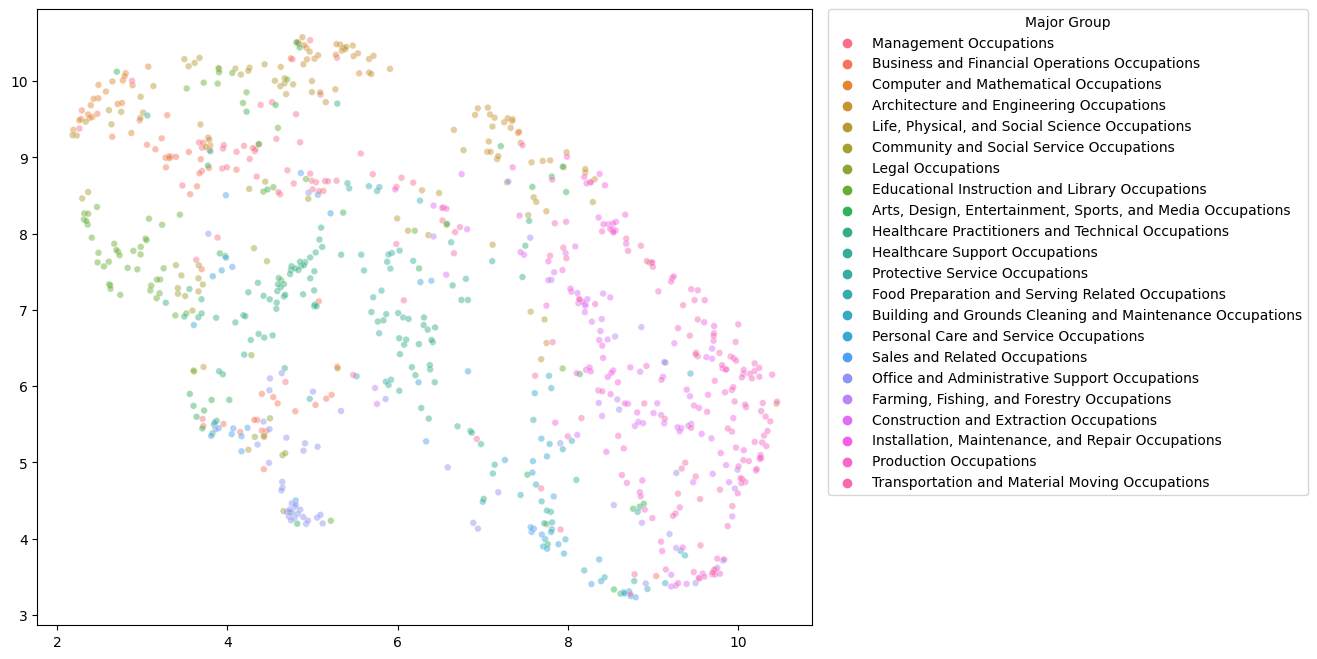

[EvalResult(eval_type='RTE', label='rte-5-euclidean', value=0.7878579610538373, info={'metric': 'euclidean', 'ntpp': 5}),
 EvalResult(eval_type='RPC', label='rpc-5-euclidean', value=0.744689299533876, info={'metric': 'euclidean', 'ntpp': 5}),
 EvalResult(eval_type='NNP', label='nnp-15-noself-euclidean', value=0.46597938144329903, info={'metric': 'euclidean', 'n_neighbors': 15}),
 EvalResult(eval_type='NNP', label='nnp-50-noself-euclidean', value=0.5228865979381444, info={'metric': 'euclidean', 'n_neighbors': 50}),
 EvalResult(eval_type='NNP', label='nnp-150-noself-euclidean', value=0.6216953035509737, info={'metric': 'euclidean', 'n_neighbors': 150})]

time: 8.36 s (started: 2023-02-05 20:23:35 -08:00)


In [13]:
import drnb.embed.pipeline as pl

pl.standard_eval(
    method="umap", dataset="onet271", extra_plot=dict(legend="force", figsize=(10, 8))
)